<a href="https://colab.research.google.com/github/Steiner-bot/Work/blob/main/%D0%9C%D0%B5%D1%82%D0%BE%D0%B4_%D0%B1%D0%B8%D1%81%D0%B5%D0%BA%D1%86%D0%B8%D0%B8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import display, Markdown

In [ ]:
def bisection(f, x_min, x_max, eps=1e-5):
  """
  Функция для метода бисекций. 

  f: функция f(x)
  x_min: левая граница отрезка
  x_max: правая граница отрезка
  eps: требуемая погрешность

  returns: левая граница получившегося отрезка, правая граница получившегося отрезка,
  количество итераций
  """

  iters = 0
  while np.abs(x_max - x_min) > eps:
    center = (x_max + x_min) / 2

    if f(x_min) * f(center) < 0:
      x_max = center
    else:
      x_min = center
    
    iters += 1

  return x_min, x_max, iters

In [ ]:
def simple_iters(f, f_der, x_min, x_max, eps=1e-5):
  """
  Функция для метода простой итерации
  
  f: функция f(x)
  f_der: производная функции f(x)
  x_min: левая граница отрезка
  x_max: правая граница отрезка
  eps: требуемая погрешность

  returns: результат f(x*), количество итераций
  """

  x_ = np.linspace(x_min, x_max, 100)
  
  # Считаем максимум и минимум производной f(x) на данном отрезке
  f_der_max = np.max(f_der(x_))
  f_der_min = np.min(f_der(x_))

  # Определяем релаксационный параметр
  tau = -2 / (f_der_min + f_der_max)

  # Определяем функцию g(x) и её производную для метода простой итерации
  g = lambda x: x + tau * f(x)
  g_der = lambda x: 1 + tau * f_der(x)

  print(f'tau = {tau}')

  # Считаем максимум модуля g'(x), чтобы проверить условие сходимости
  q = np.max(np.abs(g_der(x_)))

  # Если q >= 1, то метод на данном отрезке расходится и мы выбрасываем ошибку
  if q >= 1:
    display(Markdown(rf"""Метод расходится на данном отрезке, так как $$\max \mid g'(x) \mid = {q} >= 1$$"""))
    raise Exception

  iters = 0

  # Для удобства, чтобы прошла первая итерация цикла назначаем x_0 в центре отрезка
  # а x_1 на конце отрезка
  x_old, x_new = (x_min + x_max) / 2, x_max

  while np.abs(x_old - x_new) > eps * (1 - q)/ q:
    x_new, x_old = g(x_old), x_new
    iters += 1

  return x_new, iters

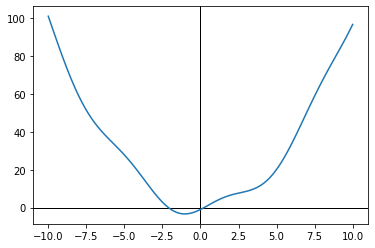

In [ ]:
# Определяем функцию и её производную
f = lambda x: x ** 2 + 4 * np.sin(x) - 1
f_der = lambda x: 2 * x + 4 * np.cos(x)

# Берем n точек в промежутке от -10 до 10
a, b, n = -10, 10, 100
x = np.linspace(a, b, 100)

# Строим график
fig, ax = plt.subplots()

ax.axhline(y=0, color='black', linewidth=1)
ax.axvline(x=0, color='black', linewidth=1)

ax.plot(x, f(x))

In [ ]:
# Определяем отрезки, на которых находятся корни
a1, b1 = -3, -1.5
a2, b2 = -0.2, 1
x1 = np.linspace(a1, b1)
x2 = np.linspace(a2, b2)

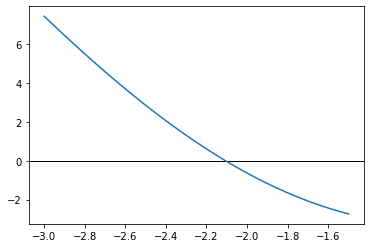

In [ ]:
# Строим график функции на первом отрезке
fig, ax = plt.subplots()
ax.axhline(y=0, color='black', linewidth=1)
ax.plot(x1, f(x1))

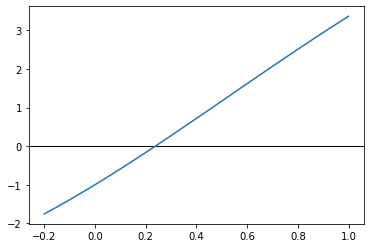

In [ ]:
# Строим график функции на втором отрезке
fig, ax = plt.subplots()
ax.axhline(y=0, color='black', linewidth=1)
ax.plot(x2, f(x2))

In [ ]:
# Находим первый корень методом бисекций и методом простой итерации
x_min_1, x_max_1, iters_bis_1 = bisection(f, a1, b1, 1e-5)
res_sim_1, iters_sim_1 = simple_iters(f, f_der, a1, b1, 1e-5)
res_bis_1 = (x_min_1 + x_max_1) / 2

display(Markdown(rf""" <b>Метод бисекций</b> <p>
Полученный результат методом бисекций за {iters_bis_1} итераций: $x = {res_bis_1:.6f}$<p>
В результате получем $\mid f(x) \mid = {np.abs(f(res_bis_1)):.6f}$ <p>
<b> Метод простой итерации </b> <p>
Полученные результат методом простой итерации за {iters_sim_1} итераций: $x = {res_sim_1:.6f}$ <p>
В результате получаем $\mid f(x) \mid = {np.abs(f(res_sim_1)):.6f}$"""))

tau = 0.15776576939050627


 <b>Метод бисекций</b> <p>
Полученный результат методом бисекций за 18 итераций: $x = -2.106866$<p>
В результате получем $\mid f(x) \mid = 0.000007$ <p>
<b> Метод простой итерации </b> <p>
Полученные результат методом простой итерации за 8 итераций: $x = -2.106863$ <p>
В результате получаем $\mid f(x) \mid = 0.000025$

In [ ]:
# Находим второй корень методом бисекций и методом простой итерации
x_min_2, x_max_2, iters_bis_2 = bisection(f, a2, b2, 1e-5)
res_sim_2, iters_sim_2 = simple_iters(f, f_der, a2, b2, 1e-5)
res_bis_2 = (x_min_2 + x_max_2) / 2

display(Markdown(rf""" <b>Метод бисекций</b> <p>
Полученный результат методом бисекций за {iters_bis_2} итераций: $x = {res_bis_2:.6f}$ <p>
В результате получем $\mid f(x) \mid = {np.abs(f(res_bis_2)):.6f}$ <p>
<b> Метод простой итерации </b> <p>
Полученные результат методом простой итерации за {iters_sim_2} итераций: $x = {res_sim_2:.6f}$<p>
В результате получаем $\mid f(x) \mid = {np.abs(f(res_sim_2)):.6f}$"""))

tau = -0.2490181799859004


 <b>Метод бисекций</b> <p>
Полученный результат методом бисекций за 17 итераций: $x = 0.238075$ <p>
В результате получем $\mid f(x) \mid = 0.000010$ <p>
<b> Метод простой итерации </b> <p>
Полученные результат методом простой итерации за 8 итераций: $x = 0.238116$<p>
В результате получаем $\mid f(x) \mid = 0.000190$